# <center>Prepare Lab of 1st Exercise</center>

## <center> Optical Character Recognition </center>

![title](../digits-classification.jpg)

### Description:

The scope of this exercise is the implementation of an optical character recognition system. Our dataset comes from __US Postal Service__, written by hand (scanned from postal envelopes), and contains digits from 0 to 9 separated in train and test set.

### Data:

We are given two text files ('train.txt' and 'text.txt'). Each line corresponds to a sample-digit and each collumn corresponds to a features of the digit. For example, the value (i, j) is the j-th feature of the i-th digit. Every digit is described from 257 values. The first is the class if the digit (if it is 0, 1 etc) and the rest 256 are the pixels that describe it in grayscale. 

### Implementation

First, we import all the necessary libraries.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

__Step 1:__ Read input data from given text files

In [2]:
# Define useful variables
data_path = "../pr_lab1_2016-17_data_0/pr_lab1_2016-17_data"
train_size = 7291
test_size = 2007
n_features = 256

# Initialize X_train, X_test, y_train, y_test
X_train = np.zeros((train_size, n_features))
X_test = np.zeros((test_size, n_features))
y_train = np.zeros(train_size)
y_test = np.zeros(test_size)

# Read train data
with open(data_path + "/train.txt") as f:
    for i, line in enumerate(f):
        # Split i-th line
        line = line.split()
        # Keep the first collumn as the class of the i-th digit
        y_train[i] = line[0]
        # Keep the rest 256 values as the pixels of the i-th digit.
        for j, pixel in enumerate(line[1:]):
            X_train[i][j] = pixel

# Read test data
with open(data_path + "/test.txt") as f:
    for i, line in enumerate(f):
        # Split i-th line
        line = line.split()
        # Keep the first collumn as the class of the i-th digit
        y_test[i] = line[0]
        # Keep the rest 256 values as the pixels of the i-th digit.
        for j, pixel in enumerate(line[1:]):
            X_test[i][j] = pixel

__Step 2:__ Plot a certain sample (index 131) as an 16x16 image

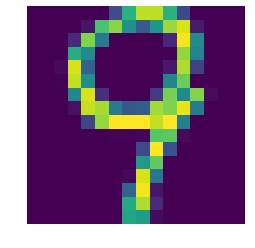

In [3]:
# Reshape the 256 vector in a 16x16 matrix.
img_131 = np.reshape(X_train[131], (16, 16)) 
plt.axis('off')
plt.imshow(img_131)

__Step 3:__ Plot one random image from every label

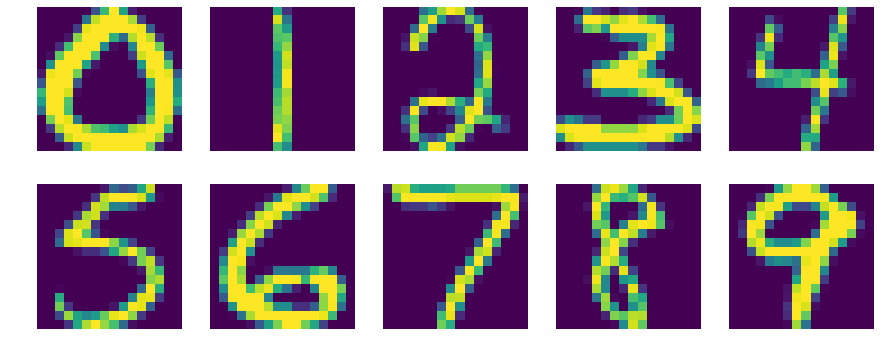

In [4]:
# Define a figure with 10 plots.
fig = plt.figure(figsize=(15,6))
columns = 5
rows = 2

for digit in range(10):
    # Pick all images of current label
    curr_data = []
    for j, y in enumerate(y_train):
        if y == digit:
            curr_data.append(X_train[j])
    # Select randomly an image
    sample = random.choice(curr_data)
    # Plot the randomly selected image in a subplot
    fig.add_subplot(rows, columns, digit+1)
    plt.axis('off')
    plt.imshow(np.reshape(sample, (16, 16)))
plt.show()

__Step 4:__ Compute the mean value of (10,10) pixel of all 0's in the train set.

In [5]:
# Get indexes of 0's
idx_0 = [i for i in range(train_size) if y_train[i] == 0]

# Get (10,10) pixel of all 0's
X_train_0_10 = np.take(X_train[:, 10*16+10], idx_0)

# Compute mean
mean_0_10 = np.mean(X_train_0_10)
print(mean_0_10)

-0.5041884422110553


__Step 5:__ Compute variance of (10,10) pixel of all 0's in the train set

In [6]:
var_0_10 = np.var(X_train_0_10)
print(var_0_10)

0.5245221428814929


__Step 6:__ Compute mean value and variance of every pixel of 0's in the train set

In [7]:
X_train_0 = np.take(X_train, idx_0, axis=0)
mean_0 = np.mean(X_train_0, axis=0, keepdims=True)
var_0 = np.var(X_train_0, axis=0, keepdims=True)
print(mean_0.shape)
print(var_0.shape)

(1, 256)
(1, 256)


__Step 7:__ Plot '0' using the mean value of each pixel.

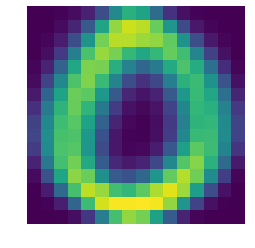

In [8]:
plt.axis("off")
plt.imshow(np.reshape(mean_0, (16, 16)))

__Step 8:__ Plot '0' using the variance of each pixel.

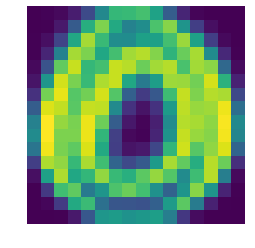

In [9]:
plt.axis("off")
plt.imshow(np.reshape(var_0, (16, 16)))

We observe that the digit in the mean-image contains less noise than in the variance-image. However, in both images the digit is distinguished.

__Step 9:__ 

(a) Compute the mean value and the variance for all digits (0-9).

In [10]:
mean = np.zeros((10, 256))
var = np.zeros((10, 256))

for digit in range(10):
    idx_i = [i for i in range(train_size) if y_train[i] == digit]
    X_train_i = np.take(X_train, idx_i, axis=0)
    mean[digit, :] = np.mean(X_train_i, axis=0, keepdims=True)
    var[digit, :] = np.var(X_train_i, axis=0, keepdims=True)

(b) Plot all digits using their mean value

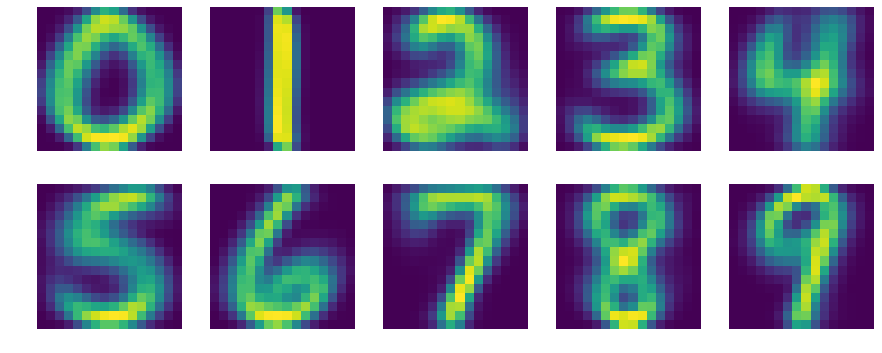

In [11]:
fig = plt.figure(figsize=(15,6))
columns = 5
rows = 2

for digit in range(10):
    fig.add_subplot(rows, columns, digit+1)
    plt.axis('off')
    plt.imshow(np.reshape(mean[digit, :], (16, 16)))
plt.show()

__Step 10:__ Classify X_test[101], using Euclidean distance

In [12]:
# Define a function that classifies a sample based on the 
# euclidean distance.
def predict_eucl(x):
    pred = 0
    dist = np.linalg.norm(x - mean[0, :])

    for i in range(1, 10):
        if np.linalg.norm(x - mean[i, :]) < dist:
            dist = np.linalg.norm(x - mean[i, :])
            pred = i
    return pred

print(predict_eucl(X_test[101]))

0


6.0


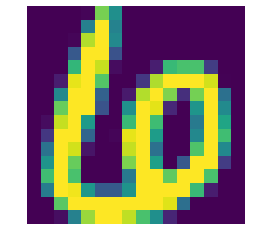

In [13]:
plt.axis('off')
plt.imshow(np.reshape(X_test[101], (16, 16)))
print(y_test[101])

We observe that the classification is wrong, since X_test[101] is the digit 6.

__Step 11:__ 

(a) Classify test set using Euclidean distance

In [14]:
y_pred = np.zeros(test_size)

for i, x in enumerate(X_test):
    y_pred[i] = predict_eucl(x)

(b) Compute accuracy

In [15]:
corr = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        corr += 1

acc = corr / len(y_test) * 100
print(acc)

81.41504733432984


__Step 12:__ Create a scikit-learn euclidean estimator

In [16]:
class EuclideanClassifier(BaseEstimator, ClassifierMixin):  
    """Classify samples based on the distance from the mean feature value"""

    def __init__(self):
        self.X_mean_ = None
        self.classes_ = None


    def fit(self, X, y):
        """
        This should fit classifier. All the "work" should be done here.
        
        Calculates self.X_mean_ based on the mean 
        feature values in X for each class.
        
        self.X_mean_ becomes a numpy.ndarray of shape 
        (n_classes, n_features)
        
        fit always returns self.
        """
        
        # Compute classes
        self.classes_ = np.unique(y)
        
        train_size, n_features = X.shape
        n_classes = len(self.classes_)
        self.X_mean_ = np.zeros((n_classes, n_features))

        for k in range(n_classes):
            idx_i = [i for i in range(train_size) if y[i] == k]
            X_k = np.take(X, idx_i, axis=0)
            self.X_mean_[k, :] = np.mean(X_k, axis=0, keepdims=True)
        
        return self


    def predict(self, X):
        """
        Make predictions for X based on the
        euclidean distance from self.X_mean_
        """
        closest = np.argmin(euclidean_distances(X, self.X_mean_), axis=1)
        return closest
    
    def score(self, X, y):
        """
        Return accuracy score on the predictions
        for X based on ground truth y
        """
        corr = 0
        y_pred = self.predict(X)
        corr = sum(int(y[i] == y_pred[i]) for i in range(len(y)))
        acc = corr / len(y)
        return acc

__Step 13:__

(a) Score above euclidean classifire using 5-fold cross-validation

In [17]:
# Define a custom scorer
def my_scorer(clf, X, y_true):
    return clf.score(X, y_true)

# Create the classifire
clf = EuclideanClassifier()
scores = cross_val_score(clf, X_train, y_train, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring=my_scorer)

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.848580 +-0.001816


(b) Plot the decision surface of the euclidean classifier

In [18]:
# Define a function that plots the decision surface of 3-dimensional data
def plot_clf(clf, X, y, labels):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of Classifier')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    
    
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                         np.arange(y_min, y_max, .05))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    zero = ax.scatter(
        X0[y == 0], X1[y == 0],
        c='blue', label=labels[0],
        s=60, alpha=0.9, edgecolors='k')
    
    one = ax.scatter(
        X0[y == 1], X1[y == 1],
        c='red', label=labels[1], 
        s=60, alpha=0.9, edgecolors='k')
    
    two = ax.scatter(
        X0[y == 2], X1[y == 2],
        c='purple', label=labels[2], 
        s=60, alpha=0.9, edgecolors='k')
    
    three = ax.scatter(
        X0[y == 3], X1[y == 3],
        c='green', label=labels[3],
        s=60, alpha=0.9, edgecolors='k')
    
    four = ax.scatter(
        X0[y == 4], X1[y == 4],
        c='gray', label=labels[4], 
        s=60, alpha=0.9, edgecolors='k')
    
    five = ax.scatter(
        X0[y == 5], X1[y == 5],
        c='orange', label=labels[5], 
        s=60, alpha=0.9, edgecolors='k')
    
    six = ax.scatter(
        X0[y == 6], X1[y == 6],
        c='black', label=labels[6],
        s=60, alpha=0.9, edgecolors='k')
    
    seven = ax.scatter(
        X0[y == 7], X1[y == 7],
        c='pink', label=labels[7], 
        s=60, alpha=0.9, edgecolors='k')
    
    eight = ax.scatter(
        X0[y == 8], X1[y == 8],
        c='white', label=labels[8], 
        s=60, alpha=0.9, edgecolors='k')
    
    nine = ax.scatter(
        X0[y == 9], X1[y == 9],
        c='yellow', label=labels[9],
        s=60, alpha=0.9, edgecolors='k')

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

Since our data is 256-dimensional, we should apply a dimensionality reduction technique in order to plot them in 3D space. We choose to use PCA.

In [19]:
# Define PCA
pca = PCA(n_components=2)
pca.fit(X_train)
# Apply PCA on train and test set
X_train_2d = pca.transform(X_train)
X_test_2d = pca.transform(X_test)

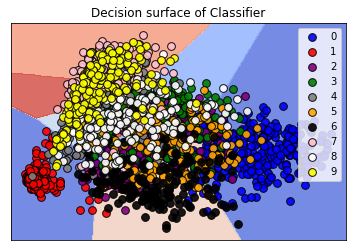

In [20]:
# Train a classifier in th 2D data and plot the decision boundary.
clf = EuclideanClassifier()
clf.fit(X_train_2d, y_train)

plot_clf(clf, X_test_2d, y_test, [i for i in range(10)])

The plot is a bit complex, since we have 10 classes instead of 2. 

(c) Plot the learning curve of the euclidean classifier

In [21]:
# Function from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

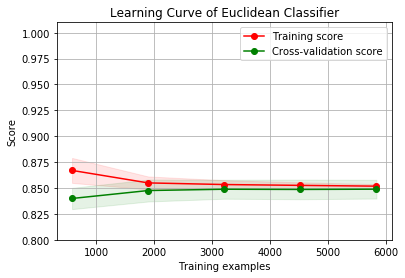

In [22]:
title = "Learning Curve of Euclidean Classifier"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = EuclideanClassifier()
plot_learning_curve(estimator, title, X_train, y_train, (0.8, 1.01), cv=cv, n_jobs=8)

plt.show()